# 1. Carga de bibliotetas

Seccion para instalar e importar bibliotecas necesarias

In [ ]:
# Acá instalamos la biblioteca fitter para el ajuste de funciones
!pip uninstall -y numpy fitter
!pip install numpy==1.23.5
!pip install fitter

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 22.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
bigframes 2.4.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 2.9 MB/s eta 0:00:00


In [ ]:
# Acá importarmos todas las bibliotecas necesarias: Pandas, Numpy, Scipy y Fitter
from fitter import Fitter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from scipy.stats import weibull_min

In [ ]:
# Esto se hace para montar el gogle drive y poder acceder datos alojados allí.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Carga de datos




In [ ]:
# En esta parte del código se debe modificar la ubicación correcta del google drive
consumos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tp6_data.csv')

# 3. Análisis Exploratorio de Datos

In [ ]:
# Corroboramos que el tipo de dato de la variable "bicis" es un dataframe
type(consumos)

pandas.core.frame.DataFrame

In [ ]:
# Primeras lineas de nuestro dataframe
consumos.head()

,Nro,Llegada,Entrada Caja,Salida Caja,Salida barista,Tiempo de atencion caja,Tiempo de atencion barista,Esperó barista,Intervalo entre Arribos
0,1,14:00,14:00,14:01,14:06,0:01,0:05,Sí,-
1,2,14:06,14:06,14:07,14:10,0:01,0:03,Sí,0:06
2,3,14:10,14:10,14:11,14:13,0:01,0:02,Sí,0:04
3,4,14:17,14:17,14:19,14:23,0:02,0:04,Sí,0:07
4,5,14:23,14:23,14:30,14:38,0:07,0:08,Sí,0:06


In [ ]:
# Si solo quiero los nombres de las columnas en formato lista
consumos.columns

Index(['Nro', 'Llegada', 'Entrada Caja', 'Salida Caja', 'Salida barista',
       'Tiempo de atencion caja', 'Tiempo de atencion barista',
       'Esperó barista', 'Intervalo entre Arribos'],
      dtype='object')

In [ ]:
# El tipo de dato de cada una de las columnas
# Acá veo que 'duracion_recorrido', 'fecha_origen_recorrido' y 'fecha_destino_recorrido'
# son de tipo object (texto) y no está bueno eso
consumos.dtypes

,0
Nro,int64
Llegada,object
Entrada Caja,object
Salida Caja,object
Salida barista,object
Tiempo de atencion caja,object
Tiempo de atencion barista,object
Esperó barista,object
ta_barista,object
ta_caja,int64


# 4. Preparación de Datos

Si debo modificar una columna, es conveniente crear una nueva y no pisar la original. Lo mismo para los dataframes

In [ ]:
consumos_filtrado_baristas = consumos[consumos['Tiempo de atencion barista'] != '-']
consumos_filtrado_caja = consumos[consumos['Tiempo de atencion caja'] != '-']
consumos_filtrado_ia = consumos[consumos['Intervalo entre Arribos'] != '-']

In [ ]:
def cortar_y_convertir(valor):
    try:
        # Verifica si el valor es nulo o tiene menos de 3 caracteres
        if pd.isna(valor) or len(str(valor)) < 3:
            return None

        # Elimina los primeros 2 caracteres y convierte el resto a entero
        return int(str(valor)[2:])
    except Exception as e:
        # Si ocurre algún error, como un valor no convertible, retorna None
        return None

# Aplicando la función a las columnas
consumos_filtrado_baristas['ta_barista'] = consumos_filtrado_baristas['Tiempo de atencion barista'].apply(cortar_y_convertir)
consumos_filtrado_ia['ia'] = consumos_filtrado_ia['Intervalo entre Arribos'].apply(cortar_y_convertir)
consumos_filtrado_caja['ta_caja'] = consumos_filtrado_caja['Tiempo de atencion caja'].apply(cortar_y_convertir)


<ipython-input-6-6a6b6a5fa4cc>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumos_filtrado_baristas['ta_barista'] = consumos_filtrado_baristas['Tiempo de atencion barista'].apply(cortar_y_convertir)
<ipython-input-6-6a6b6a5fa4cc>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumos_filtrado_ia['ia'] = consumos_filtrado_ia['Intervalo entre Arribos'].apply(cortar_y_convertir)


In [ ]:
consumos.dtypes

,0
Nro,int64
Llegada,object
Entrada Caja,object
Salida Caja,object
Salida barista,object
Tiempo de atencion caja,object
Tiempo de atencion barista,object
Esperó barista,object
Intervalo entre Arribos,object


array([[<Axes: title={'center': 'ta_caja'}>]], dtype=object)

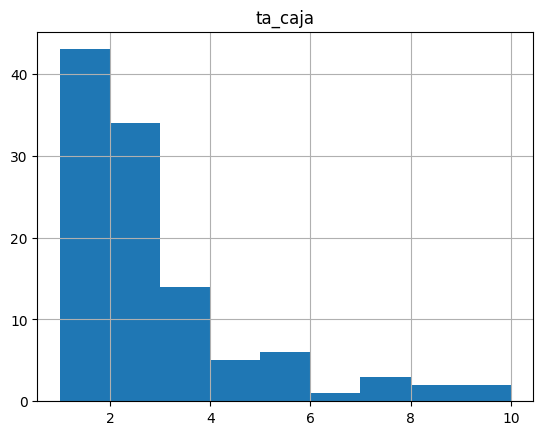

In [ ]:
# Con el histograma veo que tengo datos anómalos, mas alla de los 60 minutos.
consumos_filtrado_caja.hist('ta_caja', bins=9)

array([[<Axes: title={'center': 'ta_barista'}>]], dtype=object)

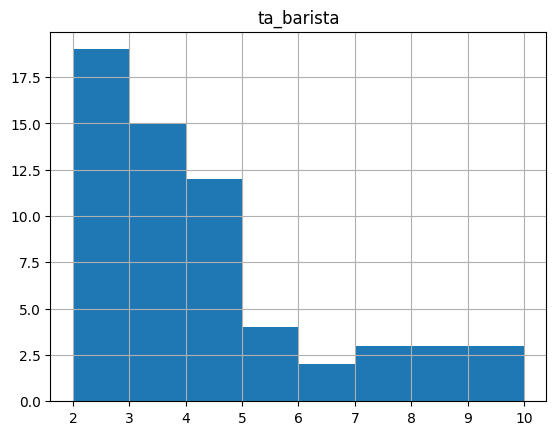

In [ ]:
consumos_filtrado_baristas.hist('ta_barista', bins=8)

array([[<Axes: title={'center': 'ia'}>]], dtype=object)

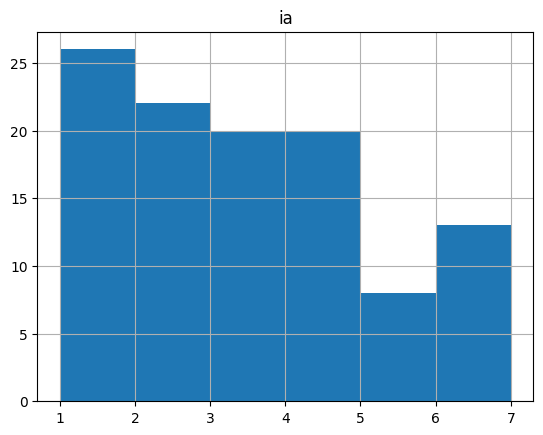

In [ ]:
consumos_filtrado_ia.hist('ia', bins=6)

In [ ]:
consumos.shape

(110, 9)

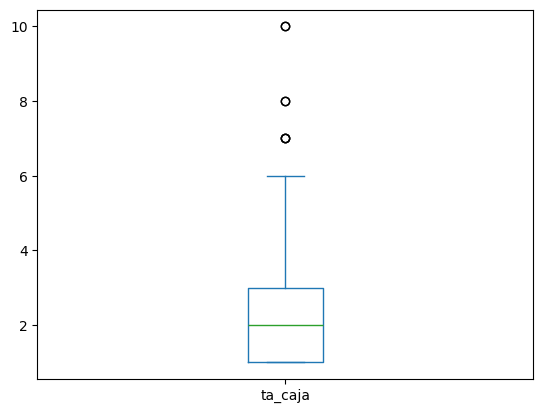

In [ ]:
# El boxplot es otro gráfico que me brinda información sobre los datos.
consumos_filtrado_caja['ta_caja'].plot(kind='box')
plt.show()

# 5. Cálculo de FDPS

In [ ]:
# En una variable preparar la columna del df que quiero ajustar
fdp_ia = Fitter(consumos_filtrado_ia.ia, bins=6, distributions=['halflogistic'])
fdp_tac = Fitter(consumos_filtrado_caja.ta_caja, bins=9)
fdp_tab = Fitter(consumos_filtrado_baristas.ta_barista, bins=8)

In [ ]:
# Con el método fit() ajusta mis datos a las 80 distribuciones de SciPy
#fdp_ia.fit()
#fdp_tac.fit()
fdp_tab.fit()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
truncexpon,0.007619,29.687911,37.761955,0.019973,0.137054,3.012569e-02
vonmises,0.008759,28.917515,36.991559,0.027829,0.264122,3.356970e-07
triang,0.009073,29.263083,37.337127,0.037406,0.238530,6.097477e-06
foldnorm,0.012007,30.088885,38.162929,0.051952,0.238532,6.095992e-06
kappa4,0.012060,29.863879,40.629271,0.048846,0.284306,2.733211e-08
kappa3,0.012944,30.599332,38.673376,0.060097,0.238532,6.095989e-06
rice,0.013260,30.869267,38.943310,0.059127,0.170526,3.060405e-03
rayleigh,0.013260,28.869267,34.251962,0.059127,0.170526,3.060402e-03
kstwobign,0.014256,29.334763,34.717458,0.063611,0.157757,7.771140e-03
maxwell,0.014271,29.029680,34.412376,0.061847,0.169518,3.302886e-03


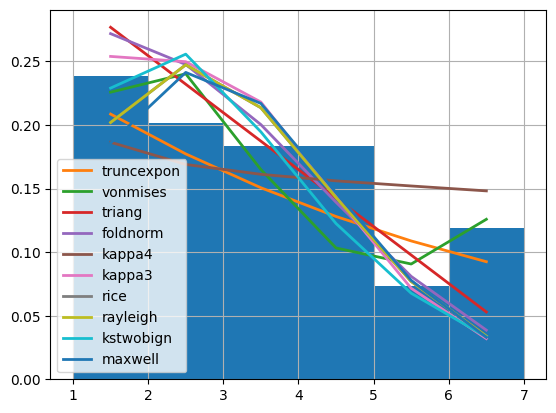

In [ ]:
# Summary me muestra el resumen de los mejores ajustes
fdp_ia.summary(10)

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
moyal,0.006246,49.551143,53.772890,0.064281,0.197252,0.014835
halflogistic,0.006457,47.389590,51.611338,0.066568,0.311475,0.000009
rel_breitwigner,0.008149,52.518517,58.851139,0.077729,0.310530,0.000010
ncx2,0.008589,48.118084,56.561580,0.047429,0.311475,0.000009
gumbel_r,0.009562,49.717606,53.939353,0.077363,0.185797,0.025717
genlogistic,0.009564,51.728151,58.060772,0.077239,0.184914,0.026794
foldnorm,0.010021,47.694062,54.026684,0.088986,0.311475,0.000009
halfnorm,0.010309,45.417387,49.639134,0.089028,0.311475,0.000009
skewnorm,0.010311,47.415342,53.747964,0.089029,0.311475,0.000009
halfgennorm,0.012277,48.804007,55.136628,0.060479,0.311475,0.000009


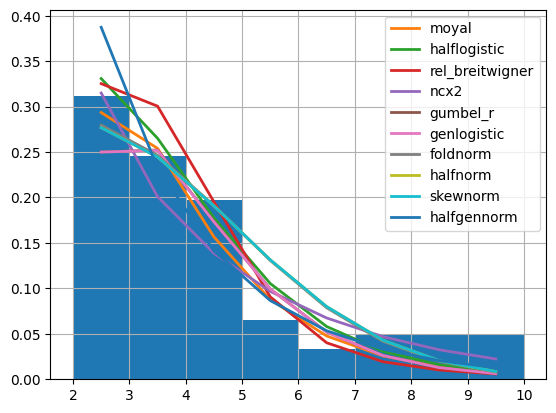

In [ ]:
fdp_tab.summary(10)

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
halflogistic,0.004419,69.049008,74.449969,0.056875,0.390909,1.184422e-15
moyal,0.004746,70.917081,76.318042,0.052261,0.250769,1.394474e-06
dpareto_lognorm,0.005452,72.101536,88.304418,0.026423,0.278509,4.894560e-08
loglaplace,0.005927,67.628335,75.729776,0.031637,0.264707,2.714734e-07
genlogistic,0.007122,74.928136,83.029577,0.060344,0.234883,8.037083e-06
gumbel_r,0.007221,72.823748,78.224708,0.060285,0.234689,8.205043e-06
truncnorm,0.007684,73.734492,84.536413,0.061300,0.390214,1.347359e-15
rel_breitwigner,0.008482,75.426173,83.527614,0.069080,0.390876,1.191735e-15
t,0.009977,77.095362,85.196804,0.071978,0.241188,4.068470e-06
tukeylambda,0.010054,76.513023,84.614464,0.067839,0.241881,3.771004e-06


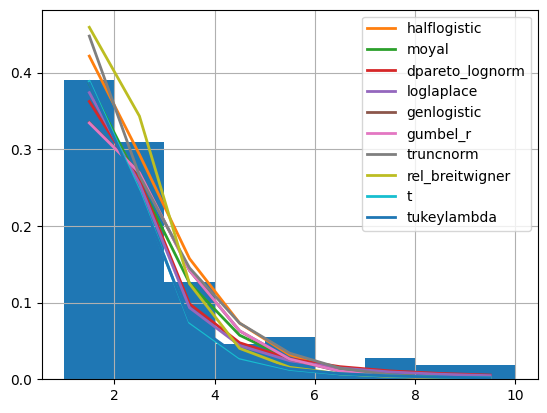

In [ ]:
fdp_tac.summary(10)

# 6. Simulacion

In [ ]:
# get_best me devuelve la mejor distribución de acuerdo al criterio que le indico y sus parámetros
fdp_tab.get_best(method='sumsquare_error')

{'halflogistic': {'loc': 2, 'scale': 1.4684641705996866}}

In [ ]:
fdp_tac.get_best(method='sumsquare_error')

{'halflogistic': {'loc': 1, 'scale': 1.1299538126456397}}

In [ ]:
fdp_ia.get_best(method='sumsquare_error')

{'rayleigh': {'loc': 0.055662641936787736, 'scale': 2.4516109648501354}}

In [ ]:
loc_tab = 2
scale_tab = 1.4684641705996866

loc_tac = 1
scale_tac = 1.1299538126456397

b_ia = 1.067608417909708
loc_ia = 0.43830138260945994
scale_ia = 6.146166055817218